<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/%E7%9B%B8%E9%96%A2%E8%A7%A3%E6%9E%90_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
uploaded = files.upload()

Saving data2.csv to data2.csv


In [13]:
df = pd.read_csv('/content/data.csv',index_col=None) # csvをデータフレームとして読み込む
print(df)

          beta C    Unnamed: 1  ... Unnamed: 10 Unnamed: 11
0              R             L  ...         NaN         NaN
1   -4.243320402  -4.608370912  ...    1.433172    1.346832
2   -5.798775431  -8.109659272  ...    1.241920    1.033213
3   -3.146160649  -3.949743545  ...    1.214559    1.274484
4   -1.117360282   -0.66321503  ...    1.167204    1.026336
5   -3.229991219  -2.632769557  ...    0.913298    0.990794
6   -0.071108777   -0.59369559  ...    1.055452    1.201399
7   -1.435022037   -1.87880998  ...    1.132043    1.045892
8    -2.31146671  -2.750735756  ...    1.452515    1.167063
9   -2.202307771  -0.363300658  ...    0.949772    1.596728
10   1.245209488   0.712478419  ...    0.620521    0.950116
11  -1.520201183  -6.683238478  ...    1.403554    0.896174
12           NaN           NaN  ...         NaN         NaN

[13 rows x 12 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
cor1_score = [1.433172061,1.241920287,1.214559246,1.167203538,0.913298381,1.055452488,1.132043435,1.452515499,0.949771813,0.620521468,1.403553692] #相関をみたい群1の値を[]内にコピペして
cor2_score = [1.346831521,1.033213158,1.274484331,1.026335763,0.990794305,1.201398549,1.045891583,1.167062683,1.596728353,0.950116361,0.896174276] #相関をみたい群2の値を[]内にコピペして
cor3_score = [-3.570920859,-0.274990257,-1.734897551,1.021248295,0.123925413,-2.103392055,-0.191175995,-3.498041695,1.597053699,-3.356077669,-1.646892185]
cor4_score = [-4.335075338,-1.34629047,-3.060233252,0.407577978,-1.999133875,-1.51553168,-2.243992514,-3.495228619,1.750866623,-3.545733914,-8.332612636]
cor5_score = [-4.243320402,-5.798775431,-3.146160649,-1.117360282,-3.229991219,-0.071108777,-1.435022037,-2.31146671,-2.202307771,1.245209488,-1.520201183]
cor6_score = [-4.608370912,-8.109659272,-3.949743545,-0.66321503,-2.632769557,-0.59369559,-1.87880998,-2.750735756,-0.363300658,0.712478419,-6.683238478]
#群数を増やしたい場合は、上記と同じ構文でコピペする（コードをよく見ればわかるはず）

df_cor1 = pd.DataFrame(cor1_score, columns=["cor1_score"])
df_cor2 = pd.DataFrame(cor2_score, columns=["cor2_score"])
df_cor3 = pd.DataFrame(cor3_score, columns=["cor3_score"])
df_cor4 = pd.DataFrame(cor4_score, columns=["cor4_score"])
df_cor5 = pd.DataFrame(cor5_score, columns=["cor5_score"])
df_cor6 = pd.DataFrame(cor6_score, columns=["cor6_score"])
df = pd.concat([df_cor1, df_cor2,df_cor3, df_cor4,df_cor5, df_cor6], axis=1)


corr = df.corr()
corr

,cor1_score,cor2_score,cor3_score,cor4_score,cor5_score,cor6_score
cor1_score,1.000000,0.081039,-0.230564,-0.407571,-0.532900,-0.664258
cor2_score,0.081039,1.000000,0.125558,0.478252,-0.224823,0.212836
cor3_score,-0.230564,0.125558,1.000000,0.652844,-0.156998,0.093907
cor4_score,-0.407571,0.478252,0.652844,1.000000,-0.047238,0.493514
cor5_score,-0.532900,-0.224823,-0.156998,-0.047238,1.000000,0.762190
cor6_score,-0.664258,0.212836,0.093907,0.493514,0.762190,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

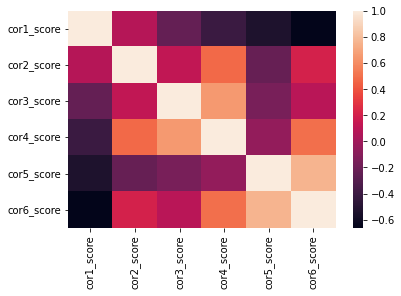

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.heatmap(corr)

plt.savefig("file_name1.jpeg",dpi=500)
files.download("file_name1.jpeg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

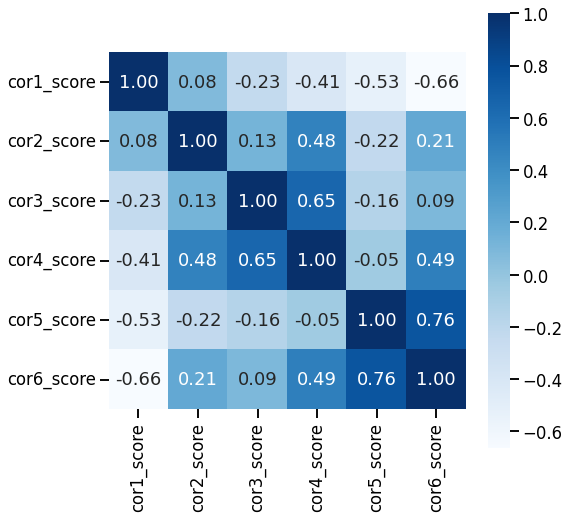

In [18]:
sns.set_context("talk")
fig = plt.subplots(figsize=(8, 8))
 
sns.heatmap(corr, annot=True,fmt='.2f',cmap='Blues',square=True)

plt.savefig("file_name2.jpeg",dpi=500)
files.download("file_name2.jpeg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

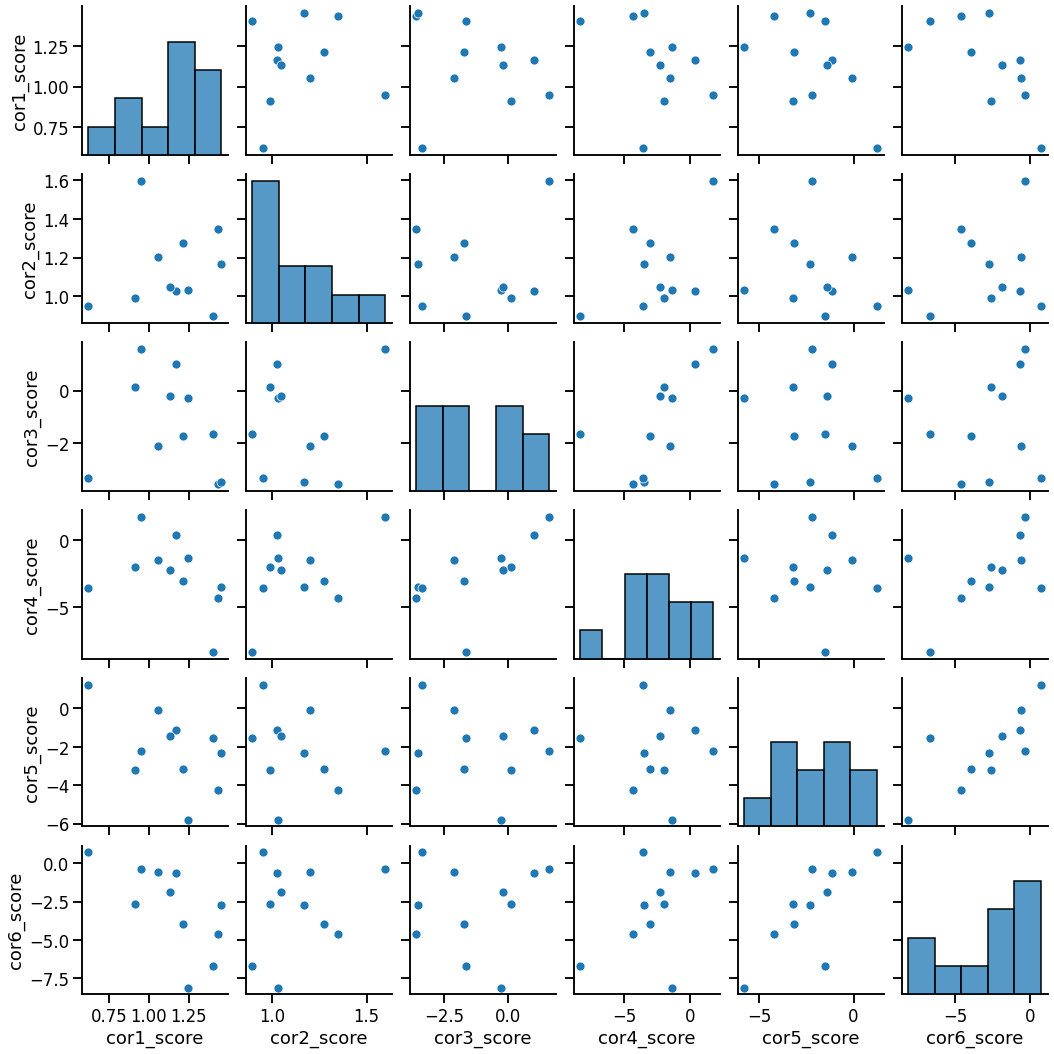

In [19]:
sns.pairplot(df)
plt.savefig("file_name3.jpeg",dpi=500)
files.download("file_name3.jpeg")

In [22]:
import itertools # 効率的なループ実行のためのイテレータ生成関数のインポート
from scipy.stats import pearsonr # 科学技術計算ライブラリ


for i, j in itertools.combinations(df, 2): #組み合わせでforループを実行
    x = df.loc[:,[i]].values
    y = df.loc[:,[j]].values
    a, b = pearsonr(np.ravel(x), np.ravel(y)) # リストを整形し相関係数:aとp値:bの計算
    if 0 != b.round(10) < 0.10: # p値 < 0.10
        print("=" * 45)
        print(i + "----" + j)
        print("相関係数:", a.round(4))
        print("p値:", b.round(4))

cor1_score----cor5_score
相関係数: -0.5329
p値: 0.0914
cor1_score----cor6_score
相関係数: -0.6643
p値: 0.0258
cor3_score----cor4_score
相関係数: 0.6528
p値: 0.0294
cor5_score----cor6_score
相関係数: 0.7622
p値: 0.0064
